In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
mes_df = pd.read_csv('MES_0622.csv')
mes_df.shape

(123710, 6)

In [6]:
mes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  123710 non-null  object 
 1   Time     123710 non-null  object 
 2   Balance  123710 non-null  object 
 3   Product  123710 non-null  object 
 4   Value    123710 non-null  float64
 5   Unit     123710 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.7+ MB


In [7]:
mes_df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,1/6/2022,Net Electricity Production,Electricity,22902.2860,GWh
1,Australia,1/6/2022,Net Electricity Production,Total Combustible Fuels,15745.8102,GWh
2,Australia,1/6/2022,Net Electricity Production,"Coal, Peat and Manufactured Gases",10236.5862,GWh
3,Australia,1/6/2022,Net Electricity Production,Oil and Petroleum Products,340.3700,GWh
4,Australia,1/6/2022,Net Electricity Production,Natural Gas,4915.8613,GWh


In [8]:
mes_df['Country'].nunique()

53

In [9]:
mes_df['Product'].value_counts()

Electricity                                   35658
Total Combustible Fuels                        7098
Total Renewables (Geo, Solar, Wind, Other)     7098
Oil and Petroleum Products                     7020
Hydro                                          7016
Combustible Renewables                         6988
Wind                                           6988
Natural Gas                                    6918
Solar                                          6826
Coal, Peat and Manufactured Gases              6611
Other Combustible Non-Renewables               6370
Not Specified                                  5547
Nuclear                                        5249
Geothermal                                     4812
Other Renewables                               3511
Name: Product, dtype: int64

There are 53 countries in the dataset

In [10]:
mes_df['Time'].max()

'1/9/2021'

In [11]:
#converting Time to datetime format
mes_df['Time'] = pd.to_datetime(mes_df['Time'])

In [12]:
mes_df['Product'].nunique()

15

In [13]:
mes_df.groupby('Time').head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,2022-01-06,Net Electricity Production,Electricity,22902.2860,GWh
1,Australia,2022-01-06,Net Electricity Production,Total Combustible Fuels,15745.8102,GWh
2,Australia,2022-01-06,Net Electricity Production,"Coal, Peat and Manufactured Gases",10236.5862,GWh
3,Australia,2022-01-06,Net Electricity Production,Oil and Petroleum Products,340.3700,GWh
4,Australia,2022-01-06,Net Electricity Production,Natural Gas,4915.8613,GWh
...,...,...,...,...,...,...
123020,Australia,2010-01-01,Net Electricity Production,Electricity,20739.2270,GWh
123021,Australia,2010-01-01,Net Electricity Production,Total Combustible Fuels,19289.7300,GWh
123022,Australia,2010-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",14796.7760,GWh
123023,Australia,2010-01-01,Net Electricity Production,Oil and Petroleum Products,732.3020,GWh


In [14]:
mes_df['Balance'].nunique()

6

In [15]:
for i in range(len(mes_df.Country)):
    if mes_df.Country[i] == 'Ireland':
        print ('Ireland found')
        break

Ireland found


In [16]:
electricity_df = mes_df.loc[mes_df['Product'] == 'Electricity']

In [17]:
ireland_elec = electricity_df.loc[electricity_df['Country'] == 'Ireland']

In [18]:
ireland_elec.head()

,Country,Time,Balance,Product,Value,Unit
246,Ireland,2022-01-06,Net Electricity Production,Electricity,2604.7124,GWh
257,Ireland,2022-01-06,Total Imports,Electricity,129.8756,GWh
258,Ireland,2022-01-06,Total Exports,Electricity,65.0647,GWh
259,Ireland,2022-01-06,Used for pumped storage,Electricity,15.3475,GWh
260,Ireland,2022-01-06,Distribution Losses,Electricity,196.3551,GWh


In [19]:
ireland_elec.loc[ireland_elec['Time'] == '2022-01-06']

,Country,Time,Balance,Product,Value,Unit
246,Ireland,2022-01-06,Net Electricity Production,Electricity,2604.7124,GWh
257,Ireland,2022-01-06,Total Imports,Electricity,129.8756,GWh
258,Ireland,2022-01-06,Total Exports,Electricity,65.0647,GWh
259,Ireland,2022-01-06,Used for pumped storage,Electricity,15.3475,GWh
260,Ireland,2022-01-06,Distribution Losses,Electricity,196.3551,GWh
261,Ireland,2022-01-06,Final Consumption (Calculated),Electricity,2457.8207,GWh


In [20]:
#grouped df for electricity in Ireland
ie_time_elec  = ireland_elec.groupby([pd.Grouper(key='Time', freq='M'), 'Balance']).agg(total_energy=('Value', 'sum'))

In [21]:
ie_time_elec.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78 entries, (Timestamp('2010-01-31 00:00:00', freq='M'), 'Distribution Losses') to (Timestamp('2022-01-31 00:00:00', freq='M'), 'Used for pumped storage')
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_energy  78 non-null     float64
dtypes: float64(1)
memory usage: 2.1+ KB


In [22]:
ax = ie_time_elec.unstack()

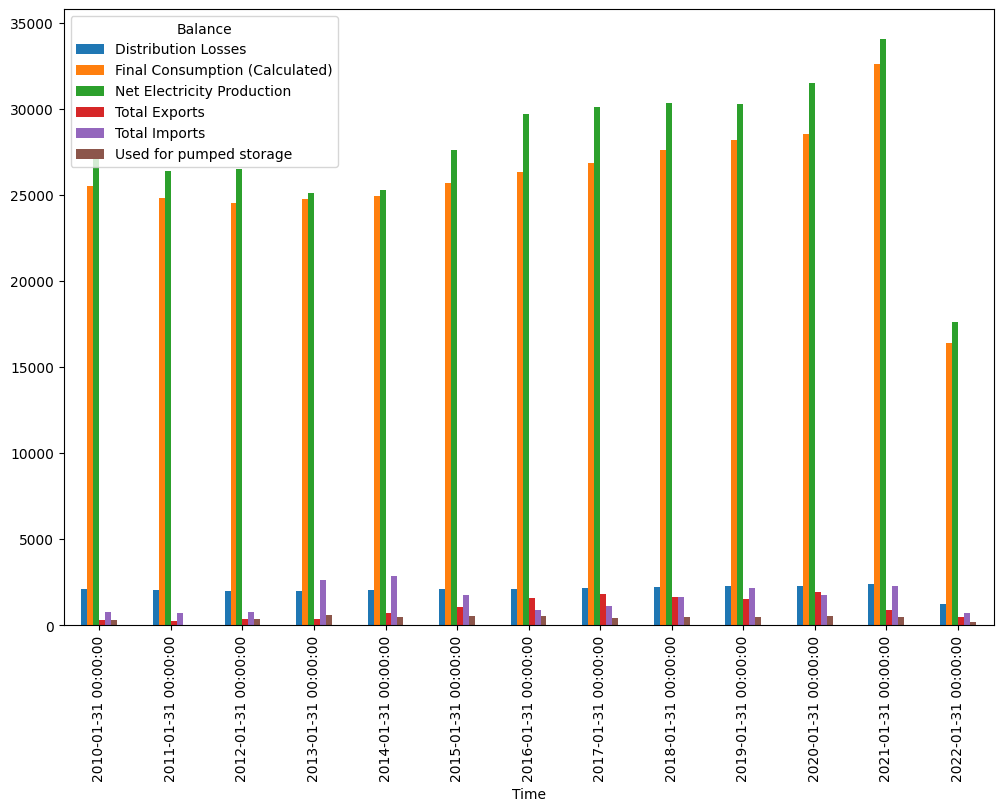

In [23]:
ax.plot(y = 'total_energy', kind='bar', figsize=(12,8));

In [24]:
ireland_df = mes_df.loc[mes_df['Country'] == 'Ireland']

In [25]:
ireland_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568 entries, 246 to 123257
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  2568 non-null   object        
 1   Time     2568 non-null   datetime64[ns]
 2   Balance  2568 non-null   object        
 3   Product  2568 non-null   object        
 4   Value    2568 non-null   float64       
 5   Unit     2568 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 140.4+ KB


In [32]:
ireland_renewables = ireland_df.loc[ireland_df['Product'] == 'Total Renewables (Geo, Solar, Wind, Other)']

In [31]:
ireland_renewables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 256 to 123252
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  150 non-null    object        
 1   Time     150 non-null    datetime64[ns]
 2   Balance  150 non-null    object        
 3   Product  150 non-null    object        
 4   Value    150 non-null    float64       
 5   Unit     150 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 8.2+ KB


In [33]:
#grouped df for renewables in Ireland
grouped_ren_df = ireland_renewables.groupby([pd.Grouper(key='Time', freq='M'), 'Balance']).agg(total_energy=('Value', 'mean'))

In [34]:
unstacked_ie_df = grouped_ren_df.unstack()

In [35]:
unstacked_ie_df.head()

,total_energy
Balance,Net Electricity Production
Time,
2010-01-31,323.842167
2011-01-31,450.350500
2012-01-31,453.361750
2013-01-31,495.301500
2014-01-31,553.354000


In [39]:
sns.lineplot(
    data = unstacked_ie_df,
    x = 'Time',
    y = 'total_energy'
);

ValueError: Data must be 1-dimensional